In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


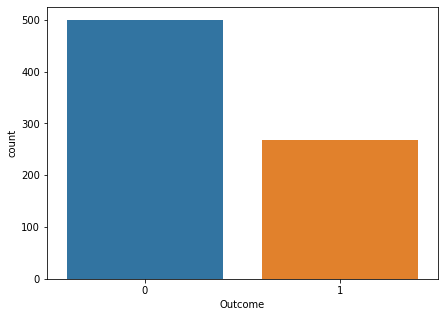

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Outcome')
plt.show()

In [10]:
data.shape

(768, 9)

In [11]:
# check if any null value is present
data.isnull().values.any()

False

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


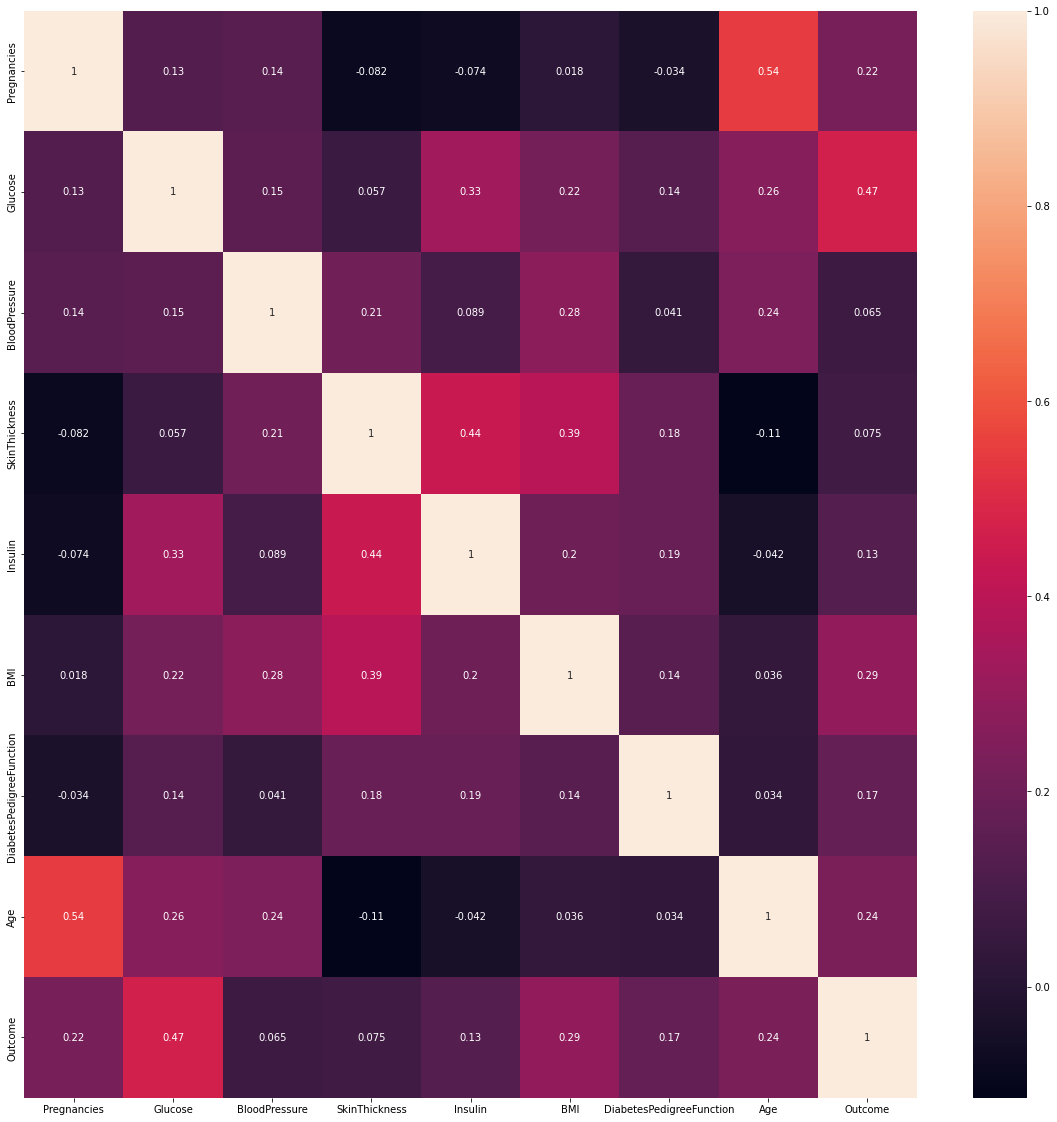

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [14]:
# check if any null value is present
data.isnull().values.any()

False

In [15]:
Y=data["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
X=data.drop("Outcome",axis=1)

In [17]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


c:\users\dhruba\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dhruba\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dhruba\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

<AxesSubplot:xlabel='Age', ylabel='Density'>

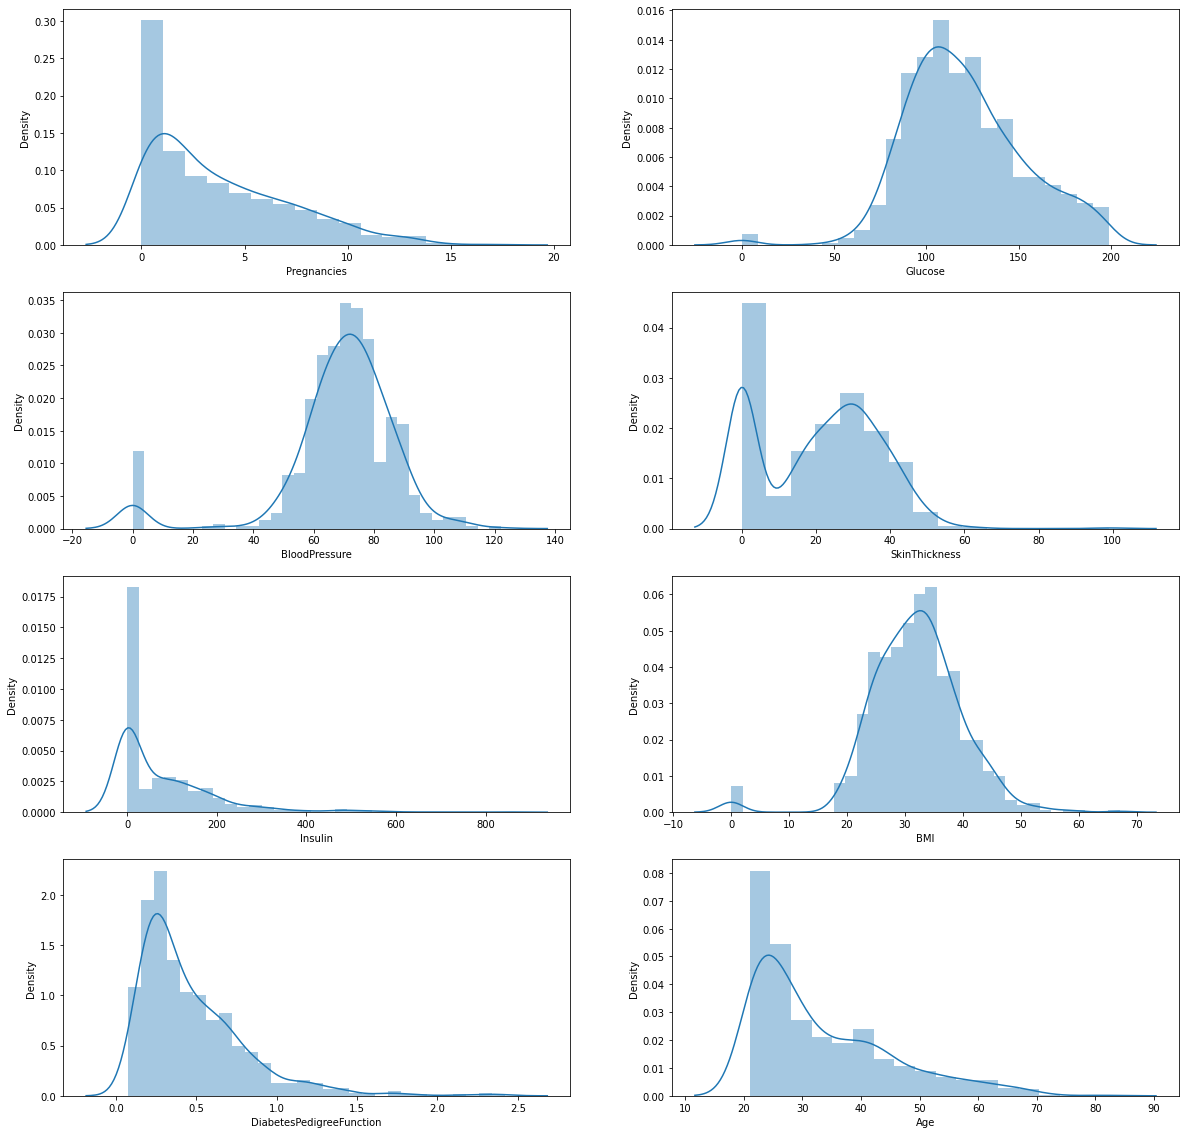

In [18]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Pregnancies, ax=axes[0,0])
sns.distplot(data.Glucose, ax=axes[0,1])
sns.distplot(data.BloodPressure, ax=axes[1,0])
sns.distplot(data.SkinThickness, ax=axes[1,1])
sns.distplot(data.Insulin, ax=axes[2,0])
sns.distplot(data.BMI, ax=axes[2,1])
sns.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(data.Age, ax=axes[3,1])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

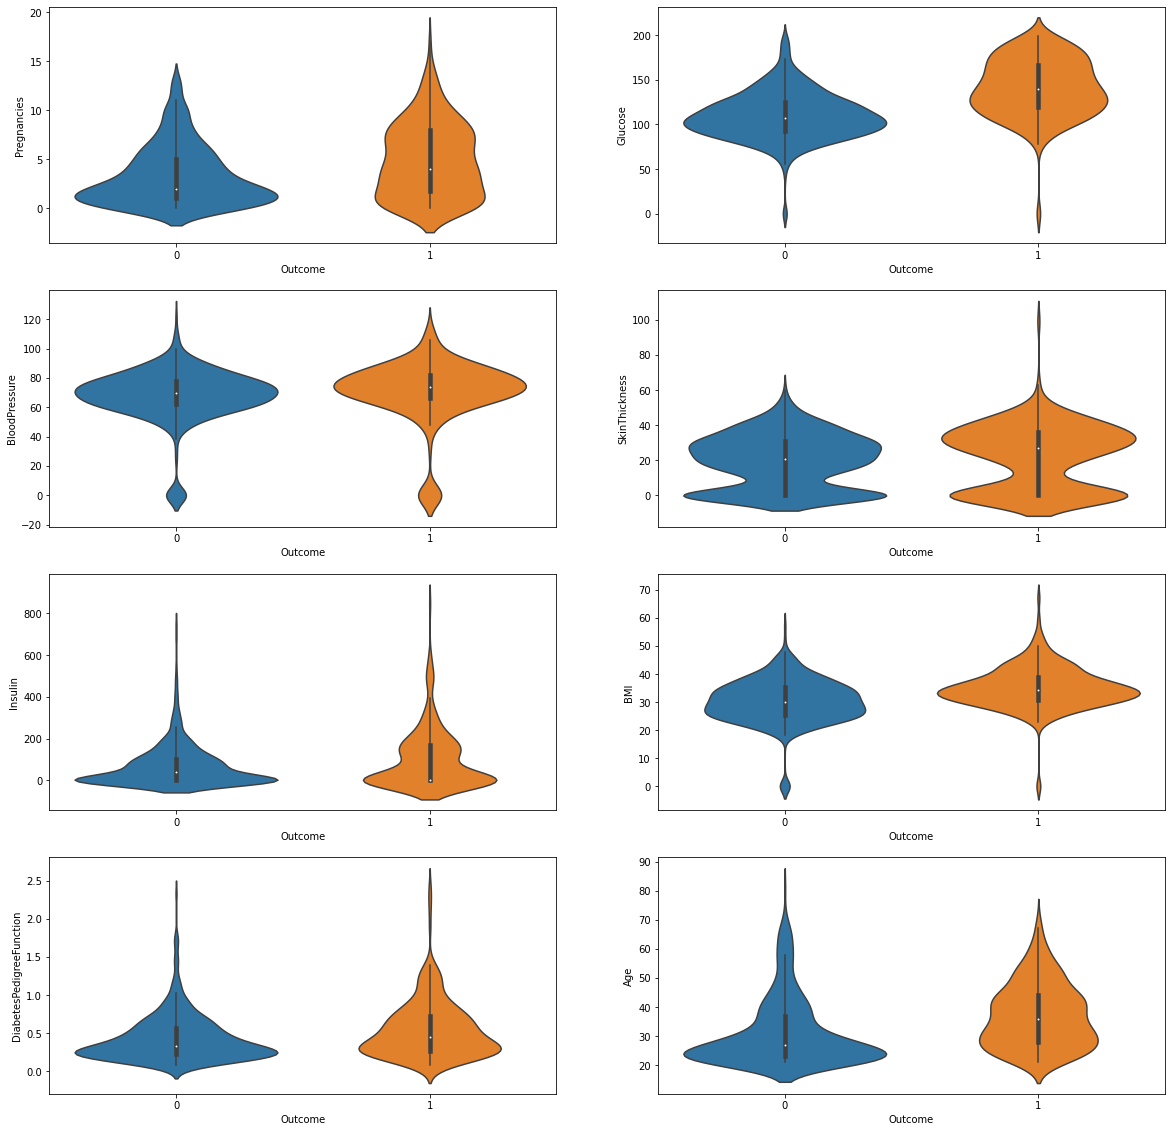

In [19]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=data.Outcome ,y=data.Pregnancies, ax=axes[0,0])
sns.violinplot(x=data.Outcome ,y=data.Glucose, ax=axes[0,1])
sns.violinplot(x=data.Outcome ,y=data.BloodPressure, ax=axes[1,0])
sns.violinplot(x=data.Outcome ,y=data.SkinThickness, ax=axes[1,1])
sns.violinplot(x=data.Outcome ,y=data.Insulin, ax=axes[2,0])
sns.violinplot(x=data.Outcome ,y=data.BMI, ax=axes[2,1])
sns.violinplot(x=data.Outcome ,y=data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=data.Outcome ,y=data.Age, ax=axes[3,1])

In [20]:
X=X.astype(float)

In [21]:
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [22]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [23]:
lst=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]

In [24]:
for i in lst:
  tem=X[i]
  mean=X[i].mean()
  for j in range(len(tem)):
    if tem[j]==0:
      tem[j]=mean
  X.replace(i,tem,inplace=True)

In [25]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50.0
1,1.0,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31.0
2,8.0,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,5.0,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,10.0,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,8.0,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54.0


In [26]:
#1st model with 1 input layer, 2 hidden layer and 1 output layer
model1 = Sequential()
model1.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(1, activation='sigmoid'))
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history1=model1.fit(X, Y,validation_split=0.33, epochs=200)

Epoch 1/200
17/17 [==============================] - 2s 31ms/step - loss: 14.3892 - accuracy: 0.6420 - val_loss: 2.1835 - val_accuracy: 0.6535
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 2.3906 - accuracy: 0.4883 - val_loss: 1.8020 - val_accuracy: 0.6654
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 1.4944 - accuracy: 0.6012 - val_loss: 1.0481 - val_accuracy: 0.4488
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.7873 - accuracy: 0.6187 - val_loss: 0.7911 - val_accuracy: 0.5669
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.6518 - val_loss: 0.7015 - val_accuracy: 0.6260
Epoch 6/200
17/17 [==============================] - 0s 10ms/step - loss: 0.6677 - accuracy: 0.6498 - val_loss: 0.7158 - val_accuracy: 0.7126
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 0.8764 - accuracy: 0.6226 - val_loss: 0.6942 - val_accuracy: 0.6850
Epoch 8/20

17/17 [==============================] - 0s 9ms/step - loss: 0.5892 - accuracy: 0.7121 - val_loss: 0.6205 - val_accuracy: 0.7008
Epoch 59/200
17/17 [==============================] - 0s 7ms/step - loss: 0.5725 - accuracy: 0.7218 - val_loss: 0.6064 - val_accuracy: 0.6890
Epoch 60/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.7004 - val_loss: 0.6160 - val_accuracy: 0.6850
Epoch 61/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5551 - accuracy: 0.7432 - val_loss: 0.5999 - val_accuracy: 0.7047
Epoch 62/200
17/17 [==============================] - 0s 10ms/step - loss: 0.5555 - accuracy: 0.7121 - val_loss: 0.6065 - val_accuracy: 0.7126
Epoch 63/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.7296 - val_loss: 0.6223 - val_accuracy: 0.6890
Epoch 64/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5606 - accuracy: 0.7315 - val_loss: 0.5810 - val_accuracy: 0.6969
Epoch 65/200
17/17

17/17 [==============================] - 0s 6ms/step - loss: 0.5179 - accuracy: 0.7471 - val_loss: 0.5713 - val_accuracy: 0.7283
Epoch 116/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5357 - accuracy: 0.7510 - val_loss: 0.6093 - val_accuracy: 0.6732
Epoch 117/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5390 - accuracy: 0.7257 - val_loss: 0.5741 - val_accuracy: 0.6929
Epoch 118/200
17/17 [==============================] - 0s 10ms/step - loss: 0.5305 - accuracy: 0.7237 - val_loss: 0.5764 - val_accuracy: 0.7205
Epoch 119/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7412 - val_loss: 0.5604 - val_accuracy: 0.7008
Epoch 120/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5171 - accuracy: 0.7549 - val_loss: 0.6131 - val_accuracy: 0.6929
Epoch 121/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5253 - accuracy: 0.7451 - val_loss: 0.5952 - val_accuracy: 0.7008
Epoch 122/20

17/17 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7782 - val_loss: 0.5825 - val_accuracy: 0.7362
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4725 - accuracy: 0.7977 - val_loss: 0.5725 - val_accuracy: 0.7402
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7626 - val_loss: 0.5849 - val_accuracy: 0.7283
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.7160 - val_loss: 0.6132 - val_accuracy: 0.7087
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5483 - accuracy: 0.7451 - val_loss: 0.5753 - val_accuracy: 0.7441
Epoch 177/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4998 - accuracy: 0.7471 - val_loss: 0.7146 - val_accuracy: 0.7126
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6148 - accuracy: 0.7393 - val_loss: 0.6540 - val_accuracy: 0.7205
Epoch 179/200

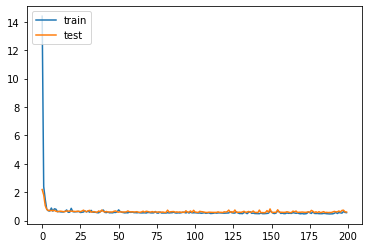

In [28]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [29]:
#2nd model with 1 input layer, 3 hidden layer, 1 output layer
model2 = Sequential()
model2.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model2.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model2.add(Dense(1, activation='sigmoid'))
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history2=model2.fit(X, Y,validation_split=0.33, epochs=200)

Epoch 1/200
17/17 [==============================] - 2s 30ms/step - loss: 1.2324 - accuracy: 0.5331 - val_loss: 0.8117 - val_accuracy: 0.6220
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 0.7720 - accuracy: 0.5895 - val_loss: 0.7449 - val_accuracy: 0.5394
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7515 - accuracy: 0.6012 - val_loss: 0.6527 - val_accuracy: 0.6850
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6615 - val_loss: 0.6603 - val_accuracy: 0.6299
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6790 - val_loss: 0.6334 - val_accuracy: 0.6575
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6059 - accuracy: 0.6868 - val_loss: 0.7552 - val_accuracy: 0.6850
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.8958 - accuracy: 0.5778 - val_loss: 0.8251 - val_accuracy: 0.6811
Epoch 8/200


Epoch 59/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5229 - accuracy: 0.7354 - val_loss: 0.5557 - val_accuracy: 0.7165
Epoch 60/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7393 - val_loss: 0.5693 - val_accuracy: 0.7165
Epoch 61/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7043 - val_loss: 0.5653 - val_accuracy: 0.7126
Epoch 62/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5567 - accuracy: 0.6965 - val_loss: 0.6537 - val_accuracy: 0.6850
Epoch 63/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 0.6887 - val_loss: 0.6680 - val_accuracy: 0.6811
Epoch 64/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5889 - accuracy: 0.7004 - val_loss: 0.5621 - val_accuracy: 0.7283
Epoch 65/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5562 - accuracy: 0.7374 - val_loss: 0.5973 - val_accuracy: 0.6850
Epoch 

17/17 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.7549 - val_loss: 0.5446 - val_accuracy: 0.7205
Epoch 117/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.7607 - val_loss: 0.5767 - val_accuracy: 0.6929
Epoch 118/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.7568 - val_loss: 0.5762 - val_accuracy: 0.6850
Epoch 119/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5019 - accuracy: 0.7549 - val_loss: 0.5529 - val_accuracy: 0.7283
Epoch 120/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5249 - accuracy: 0.7471 - val_loss: 0.5406 - val_accuracy: 0.7205
Epoch 121/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.7568 - val_loss: 0.5593 - val_accuracy: 0.7205
Epoch 122/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.7860 - val_loss: 0.5825 - val_accuracy: 0.6890
Epoch 123/200

17/17 [==============================] - 0s 6ms/step - loss: 0.4816 - accuracy: 0.7471 - val_loss: 0.5698 - val_accuracy: 0.6969
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4966 - accuracy: 0.7607 - val_loss: 0.5490 - val_accuracy: 0.7402
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4801 - accuracy: 0.7568 - val_loss: 0.7090 - val_accuracy: 0.7087
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4998 - accuracy: 0.7607 - val_loss: 0.5657 - val_accuracy: 0.7126
Epoch 177/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5134 - accuracy: 0.7490 - val_loss: 0.5646 - val_accuracy: 0.7165
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4766 - accuracy: 0.7782 - val_loss: 0.5497 - val_accuracy: 0.7520
Epoch 179/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4897 - accuracy: 0.7685 - val_loss: 0.5744 - val_accuracy: 0.7047
Epoch 180/200

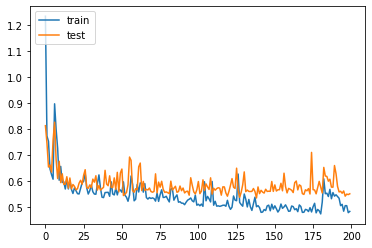

In [31]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [32]:
#3rd model with 1 input layer,  4 hidden layer, 1 output layer
model3 = Sequential()
model3.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model3.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model3.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model3.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model3.add(Dense(1, activation='sigmoid'))
# Compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history3=model3.fit(X, Y,validation_split=0.33, epochs=200)

Epoch 1/200
17/17 [==============================] - 1s 25ms/step - loss: 1.5487 - accuracy: 0.5661 - val_loss: 0.7475 - val_accuracy: 0.6378
Epoch 2/200
17/17 [==============================] - 0s 6ms/step - loss: 0.7348 - accuracy: 0.6226 - val_loss: 0.6524 - val_accuracy: 0.6890
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6790 - val_loss: 0.6081 - val_accuracy: 0.7126
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.7153 - accuracy: 0.6673 - val_loss: 0.6272 - val_accuracy: 0.6811
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6624 - accuracy: 0.6732 - val_loss: 0.6271 - val_accuracy: 0.7047
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.7004 - val_loss: 0.6531 - val_accuracy: 0.6850
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.6654 - val_loss: 0.6547 - val_accuracy: 0.6850
Epoch 8/200


17/17 [==============================] - 0s 11ms/step - loss: 0.5361 - accuracy: 0.7296 - val_loss: 0.6024 - val_accuracy: 0.6772
Epoch 59/200
17/17 [==============================] - 0s 11ms/step - loss: 0.5526 - accuracy: 0.7315 - val_loss: 0.5940 - val_accuracy: 0.7087
Epoch 60/200
17/17 [==============================] - 0s 11ms/step - loss: 0.7104 - accuracy: 0.6751 - val_loss: 0.6417 - val_accuracy: 0.6614
Epoch 61/200
17/17 [==============================] - 0s 10ms/step - loss: 0.5465 - accuracy: 0.7198 - val_loss: 0.5712 - val_accuracy: 0.7205
Epoch 62/200
17/17 [==============================] - 0s 11ms/step - loss: 0.5237 - accuracy: 0.7412 - val_loss: 0.5931 - val_accuracy: 0.7087
Epoch 63/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5446 - accuracy: 0.7257 - val_loss: 0.6593 - val_accuracy: 0.6969
Epoch 64/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5374 - accuracy: 0.7471 - val_loss: 0.5943 - val_accuracy: 0.7047
Epoch 65/200
1

17/17 [==============================] - 0s 6ms/step - loss: 0.4980 - accuracy: 0.7724 - val_loss: 0.5981 - val_accuracy: 0.7087
Epoch 116/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5196 - accuracy: 0.7510 - val_loss: 0.5869 - val_accuracy: 0.6890
Epoch 117/200
17/17 [==============================] - 0s 6ms/step - loss: 0.7520 - accuracy: 0.7043 - val_loss: 0.5991 - val_accuracy: 0.7047
Epoch 118/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.7276 - val_loss: 0.5593 - val_accuracy: 0.7323
Epoch 119/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5119 - accuracy: 0.7471 - val_loss: 0.5532 - val_accuracy: 0.7441
Epoch 120/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5112 - accuracy: 0.7471 - val_loss: 0.5653 - val_accuracy: 0.7362
Epoch 121/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4959 - accuracy: 0.7626 - val_loss: 0.5824 - val_accuracy: 0.6969
Epoch 122/200

17/17 [==============================] - 0s 5ms/step - loss: 0.5047 - accuracy: 0.7529 - val_loss: 0.5897 - val_accuracy: 0.6732
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.7607 - val_loss: 0.5601 - val_accuracy: 0.7165
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.7685 - val_loss: 0.5619 - val_accuracy: 0.6850
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.7782 - val_loss: 0.5433 - val_accuracy: 0.7480
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.7918 - val_loss: 0.5507 - val_accuracy: 0.7126
Epoch 177/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4725 - accuracy: 0.7646 - val_loss: 0.5546 - val_accuracy: 0.7480
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4933 - accuracy: 0.7549 - val_loss: 0.5590 - val_accuracy: 0.7126
Epoch 179/200

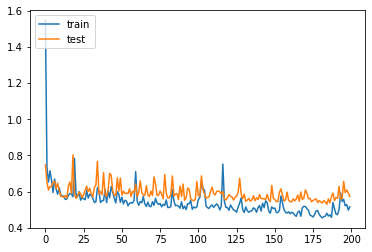

In [34]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [35]:
#4th model with 1 input layer,  4 hidden layer, 1 output layer but more  no of neurons
model4 = Sequential()
model4.add(Dense(300, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model4.add(Dense(150,activation='relu',kernel_initializer='glorot_uniform'))
model4.add(Dense(75,activation='relu',kernel_initializer='glorot_uniform'))
model4.add(Dense(30,activation='relu',kernel_initializer='glorot_uniform'))
model4.add(Dense(1, activation='sigmoid'))
# Compile model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history4=model4.fit(X, Y,validation_split=0.33, epochs=200)

Epoch 1/200
17/17 [==============================] - 1s 22ms/step - loss: 1.9549 - accuracy: 0.5584 - val_loss: 0.9697 - val_accuracy: 0.3504
Epoch 2/200
17/17 [==============================] - 0s 6ms/step - loss: 0.9314 - accuracy: 0.5837 - val_loss: 0.8373 - val_accuracy: 0.6339
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.8270 - accuracy: 0.6440 - val_loss: 0.8515 - val_accuracy: 0.6732
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7536 - accuracy: 0.6615 - val_loss: 0.6068 - val_accuracy: 0.7047
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6630 - accuracy: 0.6634 - val_loss: 0.6651 - val_accuracy: 0.6890
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.6829 - val_loss: 0.6476 - val_accuracy: 0.6693
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.6615 - val_loss: 0.6557 - val_accuracy: 0.7008
Epoch 8/200


Epoch 59/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7393 - val_loss: 0.5509 - val_accuracy: 0.7047
Epoch 60/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5262 - accuracy: 0.7432 - val_loss: 0.5574 - val_accuracy: 0.7323
Epoch 61/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7315 - val_loss: 0.5865 - val_accuracy: 0.6614
Epoch 62/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.7451 - val_loss: 0.5655 - val_accuracy: 0.7087
Epoch 63/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5320 - accuracy: 0.7354 - val_loss: 0.5486 - val_accuracy: 0.6929
Epoch 64/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5304 - accuracy: 0.7393 - val_loss: 0.5986 - val_accuracy: 0.6929
Epoch 65/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5428 - accuracy: 0.7296 - val_loss: 0.5566 - val_accuracy: 0.7126
Epoch 

17/17 [==============================] - 0s 10ms/step - loss: 0.5234 - accuracy: 0.7354 - val_loss: 0.5536 - val_accuracy: 0.7283
Epoch 117/200
17/17 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7237 - val_loss: 0.5901 - val_accuracy: 0.6693
Epoch 118/200
17/17 [==============================] - 0s 11ms/step - loss: 0.4990 - accuracy: 0.7646 - val_loss: 0.5359 - val_accuracy: 0.7165
Epoch 119/200
17/17 [==============================] - 0s 9ms/step - loss: 0.5273 - accuracy: 0.7374 - val_loss: 0.5503 - val_accuracy: 0.7323
Epoch 120/200
17/17 [==============================] - 0s 8ms/step - loss: 0.5131 - accuracy: 0.7412 - val_loss: 0.5275 - val_accuracy: 0.7205
Epoch 121/200
17/17 [==============================] - 0s 11ms/step - loss: 0.4831 - accuracy: 0.7607 - val_loss: 0.5456 - val_accuracy: 0.7362
Epoch 122/200
17/17 [==============================] - 0s 7ms/step - loss: 0.4820 - accuracy: 0.7626 - val_loss: 0.5737 - val_accuracy: 0.6969
Epoch 123/

17/17 [==============================] - 0s 7ms/step - loss: 0.4868 - accuracy: 0.7529 - val_loss: 0.5374 - val_accuracy: 0.7126
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.7743 - val_loss: 0.5508 - val_accuracy: 0.6850
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.7763 - val_loss: 0.5415 - val_accuracy: 0.7008
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.7665 - val_loss: 0.5605 - val_accuracy: 0.7402
Epoch 177/200
17/17 [==============================] - 0s 6ms/step - loss: 0.5050 - accuracy: 0.7588 - val_loss: 0.5366 - val_accuracy: 0.7205
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4714 - accuracy: 0.7626 - val_loss: 0.5328 - val_accuracy: 0.7244
Epoch 179/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4807 - accuracy: 0.7568 - val_loss: 0.5448 - val_accuracy: 0.7283
Epoch 180/200

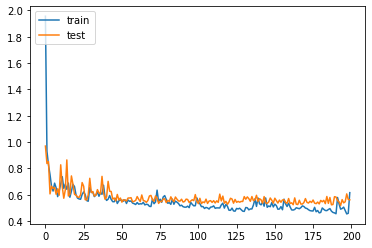

In [37]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [38]:
history4_2=model4.fit(X, Y,validation_split=0.33, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5372 - accuracy: 0.7160 - val_loss: 0.5563 - val_accuracy: 0.7047
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5248 - accuracy: 0.7432 - val_loss: 0.6040 - val_accuracy: 0.6772
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5415 - accuracy: 0.7296 - val_loss: 0.5598 - val_accuracy: 0.7205
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5488 - accuracy: 0.7198 - val_loss: 0.5797 - val_accuracy: 0.7244
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5225 - accuracy: 0.7490 - val_loss: 0.5944 - val_accuracy: 0.7283
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4987 - accuracy: 0.7490 - val_loss: 0.5615 - val_accuracy: 0.7559
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.7549 - val_loss: 0.5923 - val_accuracy: 0.7008
Epoch 8/100
1

Epoch 59/100
17/17 [==============================] - 0s 7ms/step - loss: 0.4146 - accuracy: 0.8035 - val_loss: 0.6490 - val_accuracy: 0.7362
Epoch 60/100
17/17 [==============================] - 0s 14ms/step - loss: 0.3964 - accuracy: 0.7957 - val_loss: 0.7328 - val_accuracy: 0.7165
Epoch 61/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3966 - accuracy: 0.8074 - val_loss: 0.6892 - val_accuracy: 0.7402
Epoch 62/100
17/17 [==============================] - 0s 8ms/step - loss: 0.3880 - accuracy: 0.8249 - val_loss: 0.7155 - val_accuracy: 0.7244
Epoch 63/100
17/17 [==============================] - 0s 10ms/step - loss: 0.3892 - accuracy: 0.8113 - val_loss: 0.6760 - val_accuracy: 0.7520
Epoch 64/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3754 - accuracy: 0.8171 - val_loss: 0.7599 - val_accuracy: 0.7126
Epoch 65/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3628 - accuracy: 0.8249 - val_loss: 0.7633 - val_accuracy: 0.7559
Ep

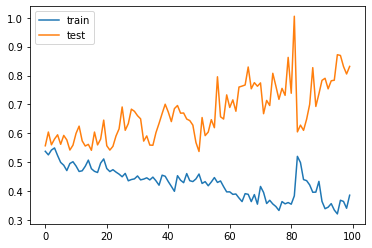

In [39]:
plt.plot(history4_2.history['loss'])
plt.plot(history4_2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [40]:
# NOW LETS NORMALISE OUR DATASET ANT THEN FEED IT INTO OUR MODEL
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_transformed = pd.DataFrame(x_scaled)

In [41]:
model5 = Sequential()
model5.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model5.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model5.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model5.add(Dense(1, activation='sigmoid'))
# Compile model
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history5=model5.fit(x_transformed, Y,validation_split=0.33, epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 20ms/step - loss: 0.6848 - accuracy: 0.5661 - val_loss: 0.6624 - val_accuracy: 0.6732
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.6401 - val_loss: 0.6397 - val_accuracy: 0.6732
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6442 - accuracy: 0.6518 - val_loss: 0.6167 - val_accuracy: 0.6850
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6195 - accuracy: 0.6712 - val_loss: 0.5866 - val_accuracy: 0.7126
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6034 - accuracy: 0.6712 - val_loss: 0.5643 - val_accuracy: 0.7559
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5810 - accuracy: 0.7296 - val_loss: 0.5391 - val_accuracy: 0.7559
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.7198 - val_loss: 0.5145 - val_accuracy: 0.7559
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4452 - accuracy: 0.7860 - val_loss: 0.4052 - val_accuracy: 0.7992
Epoch 60/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4400 - accuracy: 0.7802 - val_loss: 0.4148 - val_accuracy: 0.7953
Epoch 61/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.7957 - val_loss: 0.4126 - val_accuracy: 0.7874
Epoch 62/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.7899 - val_loss: 0.4090 - val_accuracy: 0.7953
Epoch 63/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4426 - accuracy: 0.7724 - val_loss: 0.4092 - val_accuracy: 0.8110
Epoch 64/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7821 - val_loss: 0.4181 - val_accuracy: 0.7992
Epoch 65/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4496 - accuracy: 0.7860 - val_loss: 0.4180 - val_accuracy: 0.8031
Epoch 

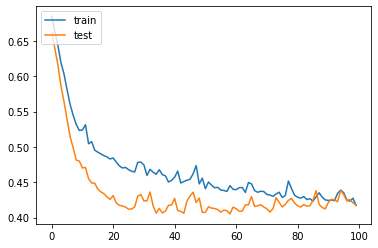

In [43]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [44]:
# INTRODUCING BATCH SIZE
model6 = Sequential()
model6.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model6.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model6.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model6.add(Dense(1, activation='sigmoid'))
# Compile model
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history6=model6.fit(x_transformed, Y,validation_split=0.33, epochs=100, batch_size=20)

Epoch 1/100
26/26 [==============================] - 1s 13ms/step - loss: 0.6927 - accuracy: 0.5331 - val_loss: 0.6833 - val_accuracy: 0.6732
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.6401 - val_loss: 0.6721 - val_accuracy: 0.6732
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6401 - val_loss: 0.6402 - val_accuracy: 0.6732
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6420 - val_loss: 0.6183 - val_accuracy: 0.6732
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.6576 - val_loss: 0.5874 - val_accuracy: 0.7165
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.6984 - val_loss: 0.5437 - val_accuracy: 0.7598
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7140 - val_loss: 0.5150 - val_accuracy: 0.7953
Epoch 8/100


Epoch 59/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.7899 - val_loss: 0.4210 - val_accuracy: 0.7874
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.7996 - val_loss: 0.4245 - val_accuracy: 0.7992
Epoch 61/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.7918 - val_loss: 0.4195 - val_accuracy: 0.7874
Epoch 62/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7840 - val_loss: 0.4200 - val_accuracy: 0.7953
Epoch 63/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.7957 - val_loss: 0.4197 - val_accuracy: 0.7913
Epoch 64/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.7879 - val_loss: 0.4177 - val_accuracy: 0.7913
Epoch 65/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.7918 - val_loss: 0.4183 - val_accuracy: 0.7795
Epoch 

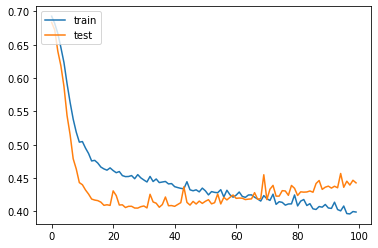

In [46]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [47]:
# we try to replace relu activation function with sigmoid for model 5
model5_2 = Sequential()
model5_2.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model5_2.add(Dense(32,activation='sigmoid',kernel_initializer='glorot_uniform'))
model5_2.add(Dense(16,activation='sigmoid',kernel_initializer='glorot_uniform'))
model5_2.add(Dense(1, activation='sigmoid'))
# Compile model
model5_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history5_2=model5_2.fit(x_transformed, Y,validation_split=0.33, epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 23ms/step - loss: 0.6565 - accuracy: 0.6401 - val_loss: 0.6340 - val_accuracy: 0.6732
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6401 - val_loss: 0.6364 - val_accuracy: 0.6732
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6401 - val_loss: 0.6325 - val_accuracy: 0.6732
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6401 - val_loss: 0.6280 - val_accuracy: 0.6732
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6496 - accuracy: 0.6401 - val_loss: 0.6257 - val_accuracy: 0.6732
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6466 - accuracy: 0.6401 - val_loss: 0.6226 - val_accuracy: 0.6732
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6431 - accuracy: 0.6401 - val_loss: 0.6181 - val_accuracy: 0.6732
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.7685 - val_loss: 0.4150 - val_accuracy: 0.8071
Epoch 60/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.7646 - val_loss: 0.4221 - val_accuracy: 0.8150
Epoch 61/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7490 - val_loss: 0.4220 - val_accuracy: 0.7992
Epoch 62/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.7763 - val_loss: 0.4134 - val_accuracy: 0.7913
Epoch 63/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4744 - accuracy: 0.7665 - val_loss: 0.4208 - val_accuracy: 0.8110
Epoch 64/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7626 - val_loss: 0.4124 - val_accuracy: 0.7953
Epoch 65/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4751 - accuracy: 0.7743 - val_loss: 0.4119 - val_accuracy: 0.7913
Epoch 

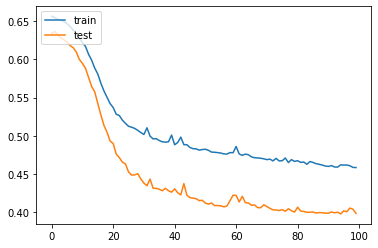

In [49]:
plt.plot(history5_2.history['loss'])
plt.plot(history5_2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [50]:
# we try to replace relu activation function with sigmoid for model 6
model6_2 = Sequential()
model6_2.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model6_2.add(Dense(32,activation='sigmoid',kernel_initializer='glorot_uniform'))
model6_2.add(Dense(16,activation='sigmoid',kernel_initializer='glorot_uniform'))
model6_2.add(Dense(1, activation='sigmoid'))
# Compile model
model6_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history6_2=model6_2.fit(x_transformed, Y,validation_split=0.33, epochs=100, batch_size=20)

Epoch 1/100
26/26 [==============================] - 1s 13ms/step - loss: 0.6697 - accuracy: 0.6401 - val_loss: 0.6415 - val_accuracy: 0.6732
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6401 - val_loss: 0.6299 - val_accuracy: 0.6732
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6401 - val_loss: 0.6252 - val_accuracy: 0.6732
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.6401 - val_loss: 0.6189 - val_accuracy: 0.6732
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.6401 - val_loss: 0.6135 - val_accuracy: 0.6732
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6401 - val_loss: 0.6021 - val_accuracy: 0.6732
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6401 - val_loss: 0.5920 - val_accuracy: 0.6732
Epoch 8/100


Epoch 59/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.7665 - val_loss: 0.4082 - val_accuracy: 0.8071
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7918 - val_loss: 0.4038 - val_accuracy: 0.8071
Epoch 61/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7685 - val_loss: 0.4036 - val_accuracy: 0.7992
Epoch 62/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.7821 - val_loss: 0.4028 - val_accuracy: 0.8110
Epoch 63/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7840 - val_loss: 0.4067 - val_accuracy: 0.8150
Epoch 64/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7724 - val_loss: 0.4050 - val_accuracy: 0.7953
Epoch 65/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7860 - val_loss: 0.4048 - val_accuracy: 0.8150
Epoch 

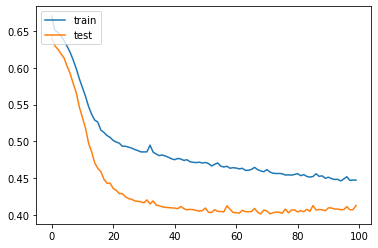

In [52]:
plt.plot(history6_2.history['loss'])
plt.plot(history6_2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')